Import revelant packages

In [313]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold

Read in the data set, split into data (`x`) and labels (`y`) then scale the data 

In [314]:
data = pd.read_csv("Mixcancer.csv")
y = np.asarray(data.pop('Diagnosis'))
x = np.asarray(data)

x = preprocessing.MinMaxScaler().fit_transform(x)

Split data and labels into test & train sets

In [315]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.5, random_state=0)

Sigmoid activation & derivative

In [316]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

def sigmoid_derivative(v):
    return sigmoid(v)*(1-sigmoid(v))

Relu activation & derivative

In [317]:
def LReLU(x):
    return np.where(x > 0, x, x * 0.01)

def dLReLU(x):
    return np.where(x > 0, 1, 0.01)

Cross entropy & derivative

In [318]:
def crossEntrop(o,y):
    return (-y*(np.log(o)) - (1-y)* np.log(1-o))

def crossEntrDeriv(o,y):
  return -(y/o - (1-y)/(1-o))

Define layer sizes

In [319]:
layer_1_size = 5
layer_2_size = 1

Initialise weights & biases

In [320]:
np.random.seed(0)
w1 = np.random.uniform(-1,1,[x_train.shape[1],layer_1_size])
w2 = np.random.uniform(-1,1,[layer_1_size])

b1 = np.zeros(layer_1_size)
b2 = np.zeros(layer_2_size)

Initialise variables for training

In [321]:
epochs = 500
lr = 0.01
batch_size = 128

Train the model

In [322]:
n = len(x_train[1])
train_E = []
test_E = []
train_Acc = []
test_Acc = []
for epoch in range(epochs):
  for i in range(0, x_train.shape[0], batch_size):
    x_batch = x_train[i:i + batch_size,:]
    y_batch = y_train[i:i + batch_size]
    if b1.shape != [layer_1_size,]:
      b1 = b1.reshape([layer_1_size,])
    if w2.shape != [layer_1_size,]:
      w2 = w2.reshape([layer_1_size,])
    in1 = x_batch@w1+b1
    out1 = sigmoid(in1)
    in2 = out1@w2+b2
    out2 = sigmoid(in2)

    dEdO2 = crossEntrDeriv(out2,y_batch)
    dO2dIn2 = sigmoid_derivative(in2)
    dO1dIn1 = sigmoid_derivative(in1)
    
    dEdW2 = 1/n * out1.T@(dEdO2*dO2dIn2)
    dEdB2 = 1/n * np.ones([1,x_batch.shape[0]])@(dEdO2*dO2dIn2)
    
    w2 = w2.reshape(1,w2.shape[0])

    dEdW1 = 1/n * x_batch.T@((np.reshape(dEdO2*dO2dIn2,[len(x_batch),1])@w2)*dO1dIn1)
    dEdB1 = 1/n * np.ones([1,x_batch.shape[0]])@((np.reshape(dEdO2*dO2dIn2,[len(x_batch),1])@w2)*dO1dIn1)

    w1 -= lr*dEdW1
    w2 -= lr*dEdW2
    b1 -= lr*dEdB1[0,:]
    b2 -= lr*dEdB2
  error_train = crossEntrop(out2,y_batch)
  b1 = b1.reshape([layer_1_size,])
  w2 = w2.reshape([layer_1_size,])
  error_test = crossEntrop(sigmoid(sigmoid(x_test@w1+b1)@w2+b2),y_test)

  train_E.append(error_train.mean())
  test_E.append(error_test.mean())

  predictions_train = np.where(out2 > 0.5, 1,0)
  prediction_test = np.where(sigmoid(sigmoid(x_test@w1+b1)@w2+b2) > 0.5,1,0)
  train_Acc.append(metrics.accuracy_score(y_batch,predictions_train))
  test_Acc.append(metrics.accuracy_score(y_test,prediction_test))


Plot accuracies & errors

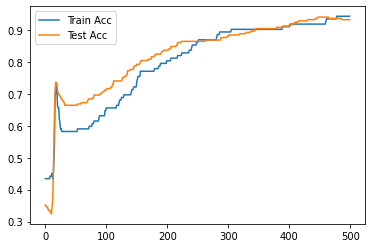

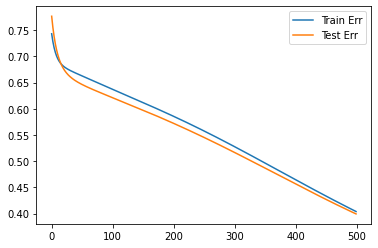

0.9426229508196722 0.932


In [323]:
plt.plot(train_Acc,label='Train Acc')
plt.plot(test_Acc,label='Test Acc')
plt.legend()
plt.show()
plt.plot(train_E,label='Train Err')
plt.plot(test_E,label='Test Err')
plt.legend()
plt.show()
print(train_Acc[-1],test_Acc[-1])